In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

pd.set_option('max_columns', 100)

In [2]:
# Retrieve data

df = pd.read_csv("waterloo_datathon_datasets/food_inspections_with_lat_long_with_affluence.csv")    # Change filename as needed

# Make sure data is what we wanted
print(df.columns)
df.head()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'facility', 'address', 'inspection_date',
       'violation_item', 'violation_description', 'critical_violation',
       'num_critical', 'num_critical_not_corrected', 'num_noncritical',
       'local_health_department', 'county', 'facility_code', 'city', 'zipcode',
       'municipality', 'permit_expiration_date', 'food_service_type',
       'food_service_description', 'nys_inspection_id', 'inspection_type',
       'inspection_comments', 'latitude', 'longitude', 'Unnamed: 23',
       'Unnamed: 24', 'lat', 'lng', 'lat_from_google', 'lng_from_google',
       'violation_description_2', 'affluence'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,facility,address,inspection_date,violation_item,violation_description,critical_violation,num_critical,num_critical_not_corrected,num_noncritical,local_health_department,county,facility_code,city,zipcode,municipality,permit_expiration_date,food_service_type,food_service_description,nys_inspection_id,inspection_type,inspection_comments,latitude,longitude,Unnamed: 23,Unnamed: 24,lat,lng,lat_from_google,lng_from_google,violation_description_2,affluence
0,0,0,STEVIE V'S - LA ROSA PIZZERIA,"6318 ROBINSON ROAD, LOCKPORT",10/3/17,15A,"Floors, walls, ceilings, not smooth, properly ...",Not Critical Violation,0.0,0.0,3.0,Niagara County,NIAGARA,F1130,LOCKPORT,14094,LOCKPORT,10/31/18,Food Service Establishment,Restaurant/Catering Operation,286815,Inspection,Restrooms: OK\nFood Testing Thermometers: OK\n...,43.124090,-78.736710,NaN,NaN,43.170613,-78.690310,43.170613,-78.690310,"Floors, walls, ceilings, not smooth, properly ...",Other
1,1,1,SCOOPS-N-MORE,"90 GLENEIDA AVENUE, CARMEL",9/9/15,10B,Non-food contact surfaces and equipment are im...,Not Critical Violation,0.0,0.0,1.0,Putnam County,PUTNAM,39-AD94,CARMEL,10512,CARMEL,3/31/18,Food Service Establishment,Restaurant,299840,Inspection,NaN,41.429351,-73.679427,NaN,NaN,36.555239,-121.923288,36.555239,-121.923288,Non-food contact surfaces and equipment are im...,Other
2,2,2,J & B LUNCHEONETTE,"189 ROUTE 9W, HAVERSTRAW",4/15/10,None,NaN,Not Critical Violation,0.0,0.0,0.0,Rockland County,ROCKLAND,43-4257,HAVERSTRAW,10927,HAVERSTRAW,4/30/18,Food Service Establishment,Food Service Establishment,303561,Inspection,NaN,41.198585,-73.981861,NaN,NaN,41.197595,-73.964584,41.197595,-73.964584,NaN,Other
3,3,3,STOLTZFUS PASTRIES,"2325 McCULLOCH ROAD, ROMULUS",7/12/12,None,NaN,Not Critical Violation,0.0,0.0,0.0,Seneca County,SENECA,49-AB01,ROMULUS,14541,VARICK,7/30/18,Food Service Establishment,Bakery,308241,Inspection,NaN,42.786649,-76.809727,NaN,NaN,42.222261,-83.396599,42.222261,-83.396599,NaN,Other
4,4,4,BOATYARD GRILL,"525 TAUGHANNOCK BOULEVARD, ITHACA",8/26/11,None,NaN,Not Critical Violation,0.0,0.0,0.0,Tompkins County,TOMPKINS,54-AH32,ITHACA,14850,ITHACA,3/31/18,Food Service Establishment,Restaurant/Catering Operation,313774,Re-Inspection,NaN,42.442929,-76.513121,NaN,NaN,42.443961,-76.501881,42.443961,-76.501881,NaN,Other


In [3]:
df = df.groupby(['county', 'affluence'], as_index=False)[['num_critical', 'num_critical_not_corrected']].mean()
df = df[df['affluence'] != 'Other']

In [4]:
# remove outliers
num_critical = df['num_critical']
num_critical_not_corrected = df['num_critical_not_corrected']
df.loc[:, 'num_critical'] = num_critical[~((num_critical - num_critical.mean()).abs() > 3*num_critical.std())]
df.loc[:, 'num_critical_not_corrected'] = num_critical_not_corrected[~((num_critical_not_corrected - num_critical_not_corrected.mean()).abs() > 2*num_critical_not_corrected.std())]

In [5]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x="affluence", y="num_critical", data=df)
# plt.ylabel('Number of critical violations', fontsize=12)
# plt.xlabel('Level of affluence', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.title("Level of Affluence vs Number of Critical Food Inspection Violations", fontsize=15)
# plt.show()

In [6]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x="affluence", y="num_critical_not_corrected", data=df)
# plt.ylabel('Number of critical violations not corrected', fontsize=12)
# plt.xlabel('Level of affluence', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.title("Level of Affluence vs Number of Repeat Critical Food Inspection Violations", fontsize=15)
# plt.show()

In [7]:
# Extra preprocessing work we may want to perform

# change affluence to numerical
df.loc[:, 'affluence'] = df.affluence.apply(lambda x: 3 if x == 'Rich' else 2 if x == 'Other' else 1 if x == 'Poor' else np.nan)

# # remove $ signs
# money_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'extra_people', 'cleaning_fee']
# df.loc[:, money_cols] = df[money_cols].apply(lambda x: x.str.replace(r"[$,]", ''))
# df.loc[:, money_cols] = df[money_cols].applymap(lambda x: np.nan if x == 'nan' else x)

# # remove % signs
# pct_cols = ['host_response_rate', 'host_acceptance_rate']
# df.loc[:, pct_cols] = df[pct_cols].apply(lambda x: x.str.replace("[%,]", ''))

# # convert categorical cols to numerical 
# df.loc[:, 'host_response_time'] = df.host_response_time.apply(lambda x: 0 if x == 'a few days or more'
#                                                               else 1 if x == 'within a day'
#                                                               else 2 if x == 'within a few hours'
#                                                               else 3 if x == 'within an hour'
#                                                               else np.nan).astype(float)

# df.host_response_time.head()

In [8]:
cols_to_use = df.columns # columns to use from dataframe. Note that only numerical columns will be kept.
temp_df = df[cols_to_use]
temp_df.head()

,county,affluence,num_critical,num_critical_not_corrected
1,ALBANY,1,0.436732,0.019809
5,CATTARAUGUS,3,0.405738,0.016393
7,CAYUGA,3,0.000000,0.000000
9,CHAUTAUQUA,3,1.054545,0.031818
12,CHENANGO,3,NaN,0.117647


In [9]:
# Data preprocessing

# Try to cast object columns to float in case they are numeric
null_values = [' ', 'N/A', 'nan']      # list of values that are considered null

for col in cols_to_use:
    if temp_df[col].dtype == 'object':
        temp_df.loc[:, col] = temp_df[col].replace(null_values, np.nan)
    temp_df.loc[:, col] = pd.to_numeric(temp_df[col], errors='ignore')

# Keep only numerical columns (necessarily to perform fillna)
temp_df = temp_df.select_dtypes(include=[np.number])
# Drop columns that are all null
temp_df.dropna(axis=1, how='all', inplace=True)

# Fill null values. By default, uses median of each column.
temp_df = temp_df.fillna(temp_df.median())

temp_df.head()

,affluence,num_critical,num_critical_not_corrected
1,1,0.436732,0.019809
5,3,0.405738,0.016393
7,3,0.000000,0.000000
9,3,1.054545,0.031818
12,3,0.436732,0.117647


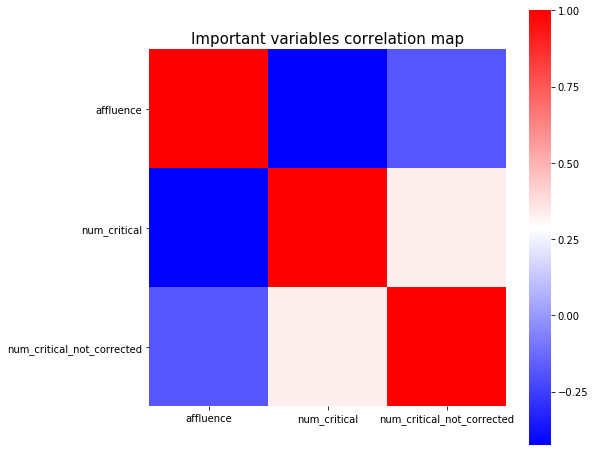

In [11]:
# Calculate correlations
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap='bwr')
plt.title("Important variables correlation map", fontsize=15)
plt.show()